# Part I

## Import libraries req

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Loading data

In [2]:
usa_train = pd.read_csv('USA_train.csv',parse_dates=["Year"],index_col="Year")
usa_test = pd.read_csv('USA_test.csv',parse_dates=["Year"],index_col="Year") 

In [3]:
usa_data = pd.concat((usa_train,usa_test))
usa_data.head()

,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
Year,,,,,,,,,,,,,,,,,,,,,
1975-01-01,AL,385,370,406,66.825000,1.566667,75.066667,2.266667,54.566667,2.866667,...,224.916667,-1.083333,8.161667,6.840833,NaN,4.684167,6.132500,5.821667,4.857500,2.718333
1975-01-01,AR,700,680,486,63.875000,2.225000,73.808333,1.208333,52.975000,3.258333,...,299.250000,8.750000,6.674167,6.331667,5.414167,4.894167,5.098333,3.680000,1.537500,3.382500
1975-01-01,AZ,NaN,268,1028,61.891667,-0.733333,74.483333,-0.291667,45.283333,0.850000,...,211.166667,43.416667,0.584167,0.403333,1.584167,0.375000,1.140833,2.805000,3.648333,0.893333
1975-01-01,CA,900,875,1074,NaN,-0.383333,72.700000,-0.466667,46.825000,1.691667,...,303.083333,NaN,2.650000,4.479167,1.613333,4.324167,1.405000,2.100833,3.068333,2.322500
1975-01-01,FL,4,4,347,73.208333,4.133333,83.983333,2.308333,64.408333,2.941667,...,49.916667,-6.666667,1.191667,1.801667,4.085000,1.762500,2.155000,1.778333,3.239167,3.455833


In [4]:
print(f"Shape of \n- Train : {usa_train.shape}\n- Test : {usa_test.shape}\n- Total data : {usa_data.shape} ")

Shape of 
- Train : (560, 24)
- Test : (400, 24)
- Total data : (960, 24) 


In [5]:
colList = usa_train.columns.to_list()

In [6]:
# REPLACING THE STRING VALUES FROM PLANTED AND HARVESTED COLUMN

usa_data["Planted (1000 Acres)"] = usa_data["Planted (1000 Acres)"].str.replace(",","")
usa_data["Harvested (1000 Acres)"] = usa_data["Harvested (1000 Acres)"].str.replace(",","")

In [7]:
# FILLING NAN VALUES WITH 1E-6 TO CONVERT IT INTO INT OBJECT

usa_data['Planted (1000 Acres)'] = usa_data['Planted (1000 Acres)'].fillna(-1e6)
usa_data['Harvested (1000 Acres)'] = usa_data['Harvested (1000 Acres)'].fillna(-1e6)

In [8]:
# CONVERTING IT INTO INT64 OBJECT

usa_data['Planted (1000 Acres)'] = usa_data['Planted (1000 Acres)'].astype(np.int64)
usa_data['Harvested (1000 Acres)'] = usa_data['Harvested (1000 Acres)'].astype(np.int64)
usa_data['Yield (Pounds/ Harvested Area)'] = usa_data['Yield (Pounds/ Harvested Area)'].astype(np.float64)

# usa_test['Planted (1000 Acres)'] = usa_test['Planted (1000 Acres)'].astype(np.int64)
# usa_test['Harvested (1000 Acres)'] = usa_test['Harvested (1000 Acres)'].astype(np.int64)
# usa_test['Yield (Pounds/ Harvested Area)'] = usa_test['Yield (Pounds/ Harvested Area)'].astype(np.int64)

In [9]:
# REPLACING 1E-6 WITH NAN TO PERFORM INTERPOLATION LATER

usa_data.replace(-1e6,np.nan,inplace=True)

In [10]:
usa_data[usa_data['State']=='AL']

,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
Year,,,,,,,,,,,,,,,,,,,,,
1975-01-01,AL,385.0,370.0,406.0,66.825000,1.566667,75.066667,2.266667,54.566667,2.866667,...,224.916667,-1.083333,8.161667,6.840833,NaN,4.684167,6.132500,5.821667,4.857500,2.718333
1976-01-01,AL,440.0,420.0,400.0,64.675000,NaN,73.891667,1.091667,49.408333,NaN,...,274.916667,45.916667,6.087500,4.766667,4.087500,4.610000,3.723333,4.412500,1.408333,1.269167
1977-01-01,AL,405.0,395.0,339.0,64.458333,3.200000,77.375000,3.575000,54.550000,2.850000,...,264.416667,37.416667,1.480833,4.160000,4.674167,3.196667,3.518333,1.207500,4.012500,2.873333
1978-01-01,AL,325.0,315.0,444.0,65.866667,1.608333,75.933333,1.133333,53.791667,2.091667,...,278.416667,50.416667,0.509167,3.188333,0.885000,0.407500,2.672500,0.361667,1.576667,0.437500
1979-01-01,AL,310.0,305.0,512.0,63.358333,2.100000,76.725000,-0.075000,51.991667,0.291667,...,267.333333,39.333333,4.295000,5.974167,6.155000,2.677500,6.143333,2.832500,2.251667,4.112500
1980-01-01,AL,325.0,321.0,415.0,63.466667,3.208333,76.466667,3.666667,NaN,2.791667,...,265.500000,39.500000,3.371667,2.050833,4.883333,4.405833,2.789167,1.478333,3.019167,0.880000
1981-01-01,AL,377.0,372.0,546.0,62.983333,-0.275000,76.341667,2.541667,50.633333,1.933333,...,261.500000,32.500000,-0.412500,-1.733333,-1.630000,0.892500,0.535000,-1.775833,3.186667,0.047500
1982-01-01,AL,287.0,285.0,777.0,65.341667,1.083333,75.750000,0.950000,53.925000,4.225000,...,219.500000,-8.500000,4.674167,1.353333,0.766667,0.289167,1.269167,1.958333,4.448333,3.309167
1983-01-01,AL,219.0,215.0,413.0,64.191667,0.933333,76.508333,1.708333,50.875000,1.175000,...,276.166667,46.166667,5.430000,6.109167,NaN,5.952500,3.783333,5.472500,5.223333,5.084167


# Part-II

IL
KY
NV

In [11]:
State_name = usa_data.State.unique()
State_name

array(['AL', 'AR', 'AZ', 'CA', 'FL', 'GA', 'IL', 'KS', 'KY', 'LA', 'MO',
       'MS', 'NC', 'NM', 'NV', 'OK', 'SC', 'TN', 'TX', 'VA'], dtype=object)

In [26]:
from feature_engine.timeseries.forecasting import WindowFeatures
from sklearn.preprocessing import StandardScaler
from feature_engine.timeseries.forecasting import LagFeatures
from sklearn.linear_model import Lasso

def preprocess_pipeline(df,sc,ifl,col=colList):
    
    lag_transformer = LagFeatures(variables=col[1:],freq=['1YS','2YS','3YS','4YS','5YS'])
    df = lag_transformer.fit_transform(df)
    
    win_transformer = WindowFeatures(variables=colList[1:],functions=["mean", "std"],freq="1YS")
    df_window = win_transformer.fit_transform(df)
    
    df_ = pd.concat([df,df_window],axis=1)
    df_ = df_.loc[:,~df_.columns.duplicated()]
    
    df_.fillna(method="bfill",inplace=True)
    df_.dropna(axis=1,inplace=True)

    df_.drop('State',axis=1,inplace=True)
    
    predf = df_.loc[:,ifl]
    
    return predf

State Name : AL
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


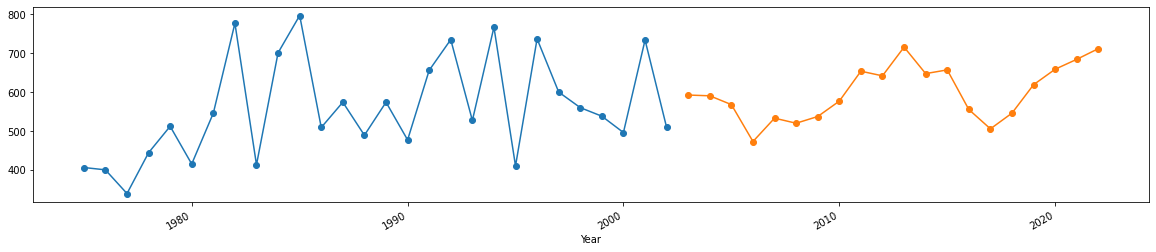

State Name : AR
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


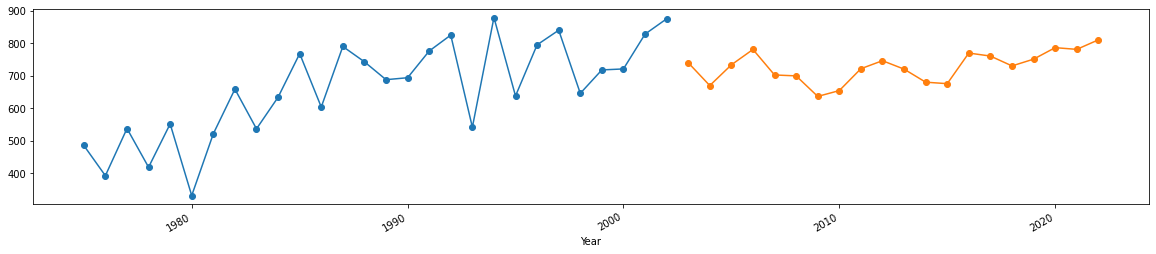

State Name : AZ
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


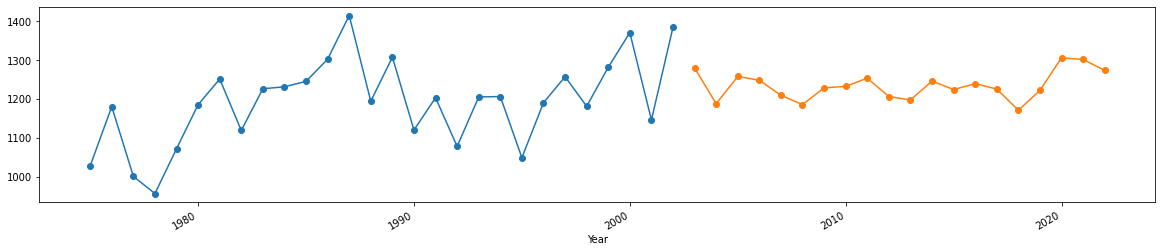

State Name : CA
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


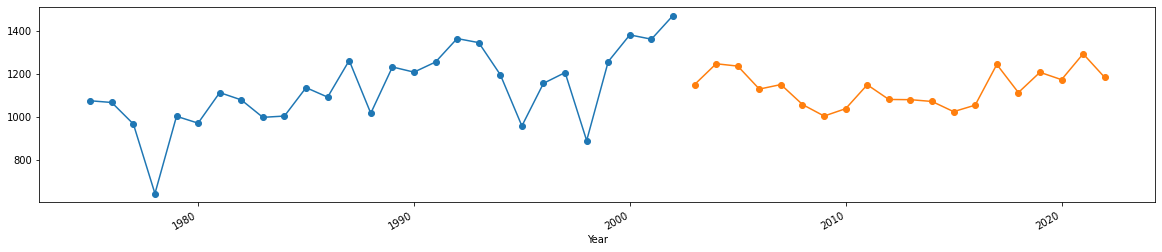

State Name : FL
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


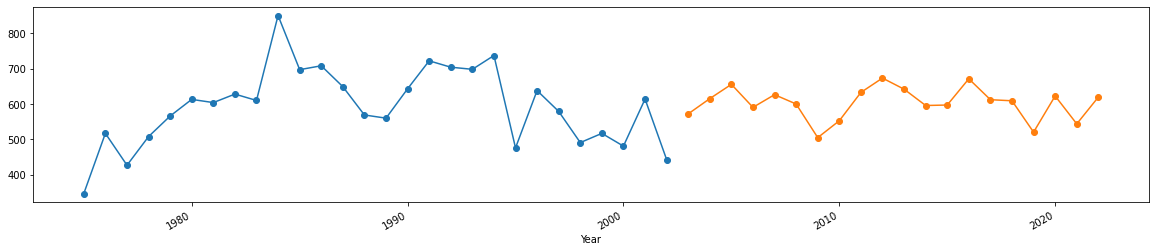

State Name : GA
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


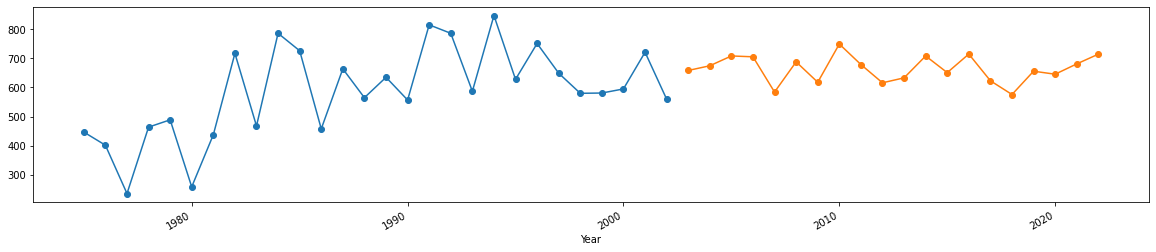

State Name : IL
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


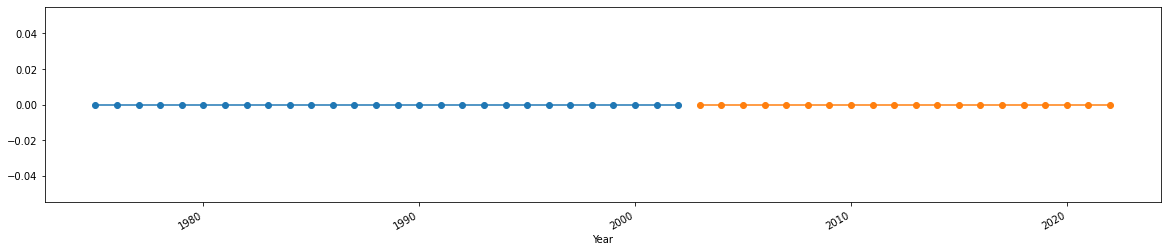

State Name : KS
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


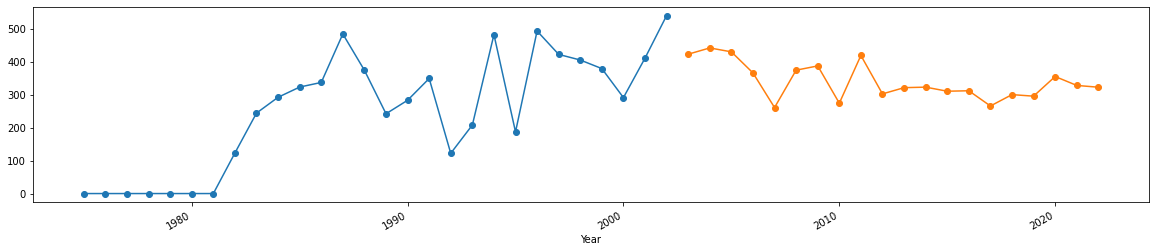

State Name : KY
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


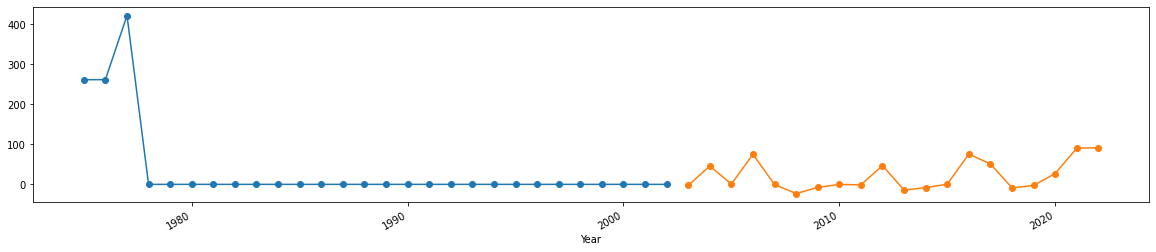

State Name : LA
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


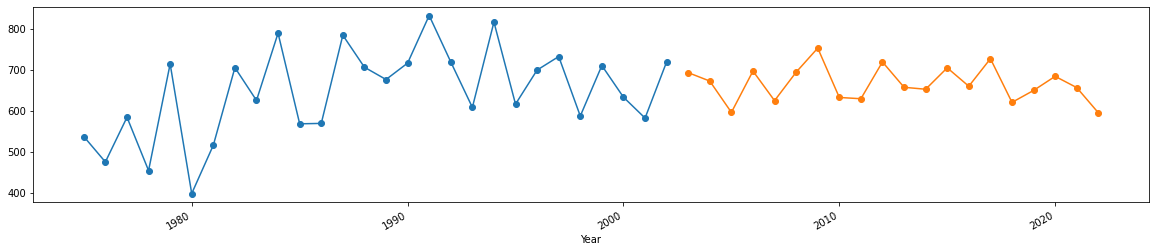

State Name : MO
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


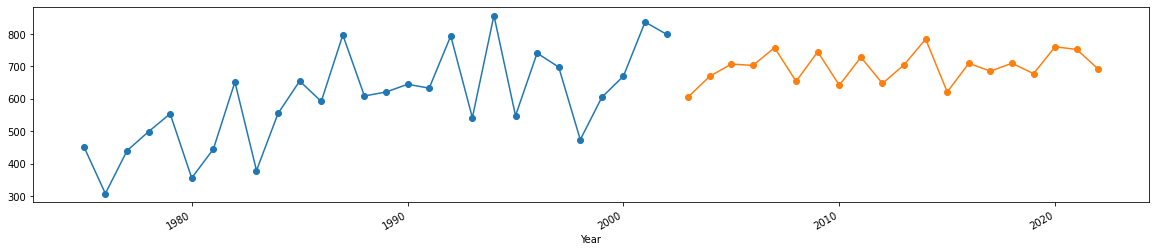

State Name : MS
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


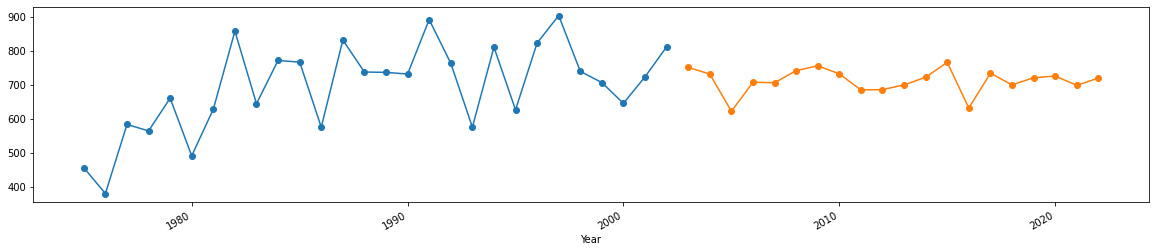

State Name : NC
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


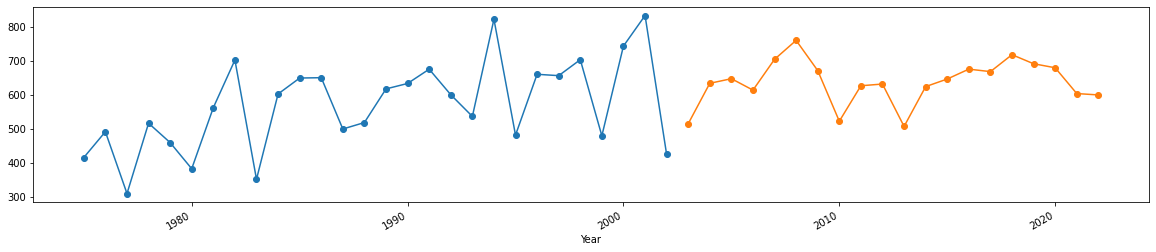

State Name : NM
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


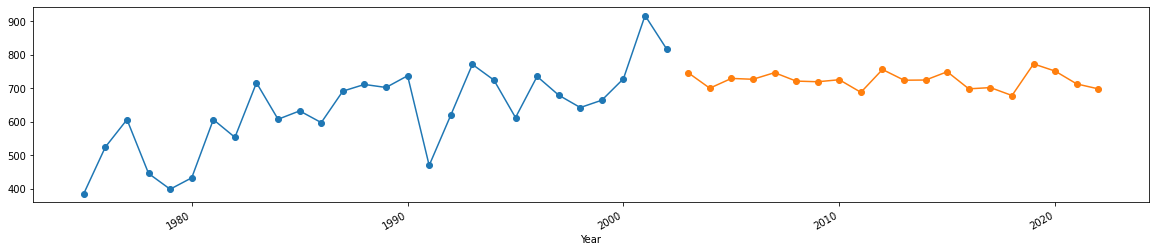

State Name : NV
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


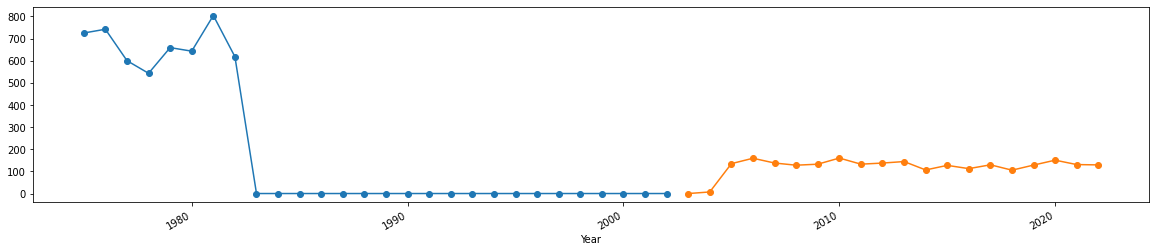

State Name : OK
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


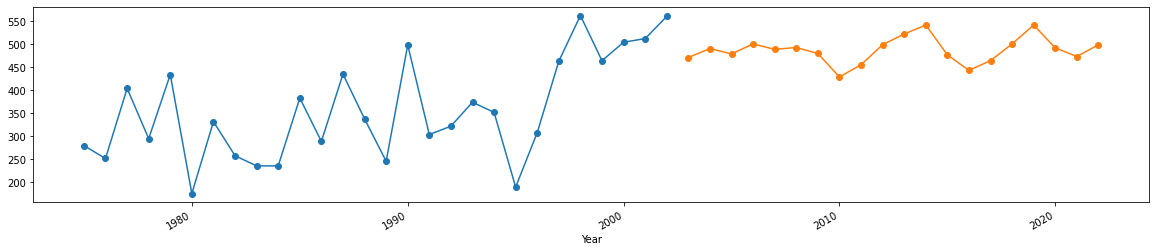

State Name : SC
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


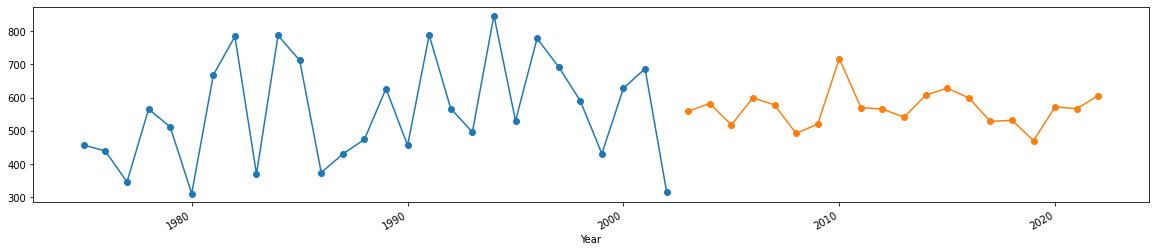

State Name : TN
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


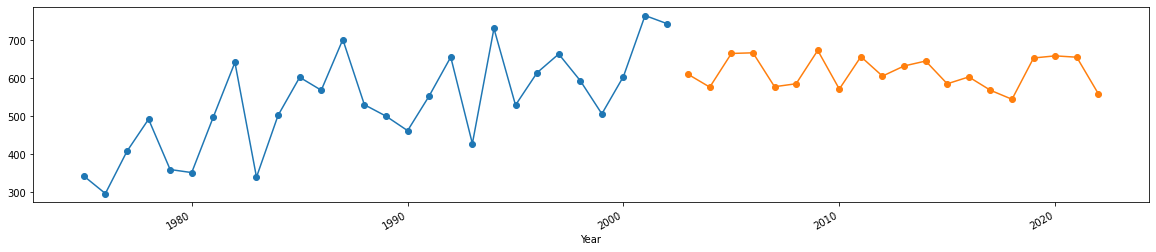

State Name : TX
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


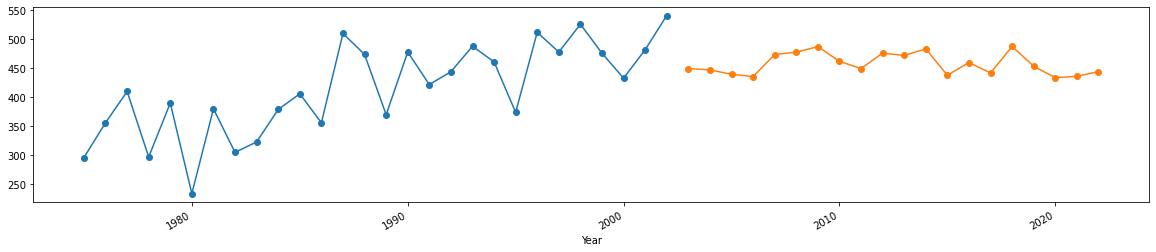

State Name : VA
Number of features 161
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


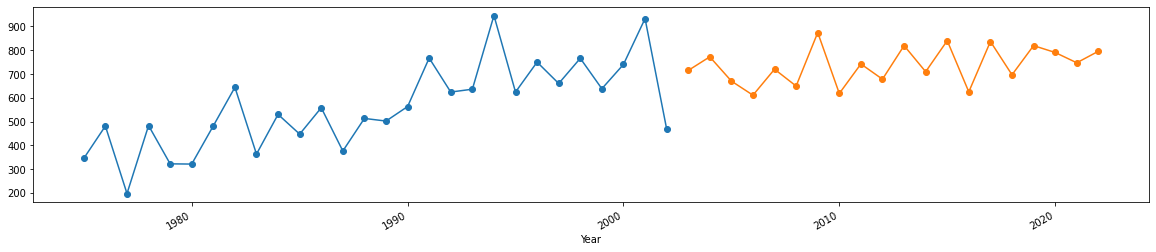

In [29]:
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMRegressor
for (i,j) in enumerate(State_name):
    
    print(f"State Name : {j}")
    State_data = usa_data[usa_data['State']==j]
    
    State_imp = State_data.interpolate(method='linear')
    State_imp = State_imp.interpolate(method='bfill')
    
    State_imp['t'] = np.round((State_imp.index - State_imp.index.min())/ np.timedelta64(1,"Y"))
    
    lag_transformer = LagFeatures(variables=colList[1:],freq=['1YS','2YS','3YS','4YS','5YS'])
    data_ = lag_transformer.fit_transform(State_imp)
    
    win_transformer = WindowFeatures(variables=colList[1:],functions=["mean", "std"],freq="1YS")
    data_window = win_transformer.fit_transform(State_imp)
    
    data_ = pd.concat([data_,data_window],axis=1)
    data_ = data_.loc[:,~data_.columns.duplicated()]
    
    data_.fillna(method="bfill",inplace=True)
    data_.drop('State',axis=1,inplace=True)
    data_.dropna(axis=1,inplace=True)
    
    train= data_[data_.index<pd.to_datetime("2003-01-01")]
    test = data_[data_.index>=pd.to_datetime("2003-01-01")]
    
    features = [col for col in data_.columns if ("lag" in col) or ("window" in col)]
    print(f"Number of features {len(features)}")
    
    sc = StandardScaler()
    data_scaled = sc.fit_transform(train[features+['t']])
    
    y = train['Yield (Pounds/ Harvested Area)'].to_frame()
    X = data_scaled
    
    model = Lasso(alpha=0.1)
    model.fit(X,y)
    
    feat_importances = pd.Series(index=features+['t'], data=model.coef_)
    sc = MinMaxScaler()

    try:
        imp_features_list = list(feat_importances.abs()[(feat_importances.abs()>0)].iloc[::-1].index)

        forecast_start = train.iloc[-1].name+pd.DateOffset(months=12)
        forecast_steps = 20
        model = LGBMRegressor(
                                min_data_in_bin=1,
                                min_data_in_leaf=1,
                                boosting = "gbdt",
                                linear_tree = True,
                                linear_lambda = 0.01,
                                n_estimators = 100,
                                bagging_freq = 1,
                                bagging_fraction = 0.8,

        )
        forecast_horizon = pd.date_range(
           forecast_start , periods=forecast_steps, freq="YS"
        )
        df_train = data_[data_.index<forecast_start]
        df_test = data_[data_.index>=forecast_start]

        feature_lis = imp_features_list
        feature_lis.append('t')

        y_train = df_train['Yield (Pounds/ Harvested Area)']
        X_train = df_train[feature_lis]

        y_test = df_test['Yield (Pounds/ Harvested Area)']
        X_test = df_test[feature_lis]

        X_train_sc = sc.fit_transform(X_train)
        X_test_sc = sc.transform(X_test)
        model.fit(X_train_sc,y_train)

        forecast_horizon = pd.date_range(X_test.index.min(),periods=20,freq="YS")

        train_df= State_imp[State_imp.index<pd.to_datetime("2003-01-01")]
        test_df = State_imp[State_imp.index>=pd.to_datetime("2003-01-01")]

        df_pred = train_df.copy()
        df_pred = pd.concat([df_pred,test_df])

        for forecast_time in forecast_horizon:
            X_test_ = preprocess_pipeline(df_pred,sc,list(imp_features_list),colList)
            X_test_ = X_test_.loc[[forecast_time]]
            X_test_n = sc.transform(X_test_)
            y_pred = model.predict(X_test_n)

            df_pred.loc[[forecast_time],'Yield (Pounds/ Harvested Area)'] = y_pred

        y_forecast = df_pred[df_pred.index>=forecast_start]

        plt.plot(y_train,label="train",linestyle="-",marker="o")
        y_forecast['Yield (Pounds/ Harvested Area)'].plot(label="Prediction",figsize=(20,4),linestyle="-",marker="o")
        plt.show()
    except:
        y_forecast['State'] = j
        y_forecast['Yield (Pounds/ Harvested Area)'] = 0
        
    if i==0:
        df = y_forecast.copy() 
    else:
        df = pd.concat([df,y_forecast])
        df = df.sort_values(by=["Year","State"])

In [31]:
df.loc[df["State"]=="NV",'Yield (Pounds/ Harvested Area)'] = 0

In [36]:
sub = pd.read_csv('sub_v1.csv')
sub.head()

,Yield (Pounds/ Harvested Area),COTTON YIELD (Kg per ha),Cotton_Price[Dollar/ton]
0,549.132608,3750.722528,1197.594127
1,857.515147,2840.205096,1306.475737
2,1287.418454,2729.317223,1247.622865
3,1212.418100,4678.365985,1090.751915
4,527.186770,4195.216915,1058.517562


In [37]:
arr = np.array(df["Yield (Pounds/ Harvested Area)"])
arr = np.append(arr,np.zeros(2076))

In [38]:
sub["Yield (Pounds/ Harvested Area)"] = arr
sub.to_csv("sub_v4.csv",index=False)

In [ ]:
# TAKING A SUBSET OF DATA BELONGING TO ONE STATE

State_data = usa_data[usa_data['State']==State_name]

In [415]:
# IMPUTE THE MISSING DATA

State_imp = State_data.interpolate(method='linear')
State_imp = State_imp.interpolate(method='bfill')

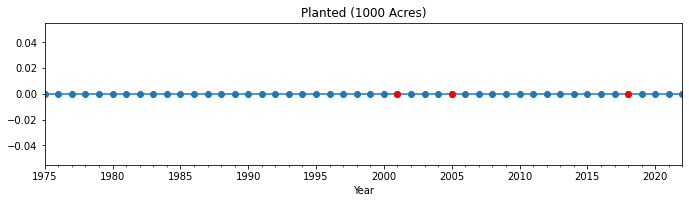

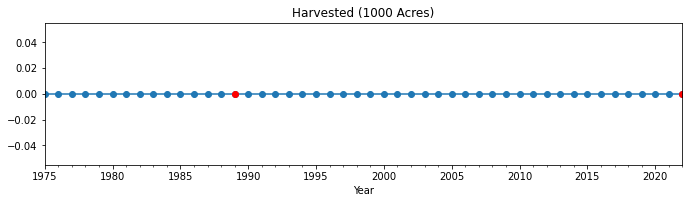

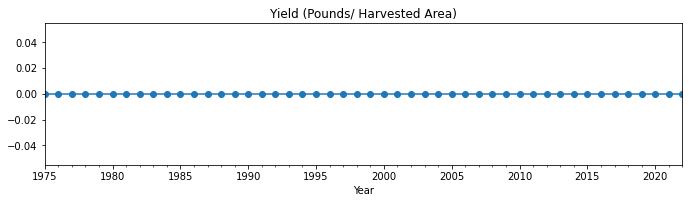

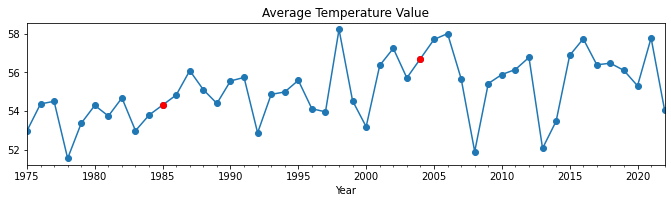

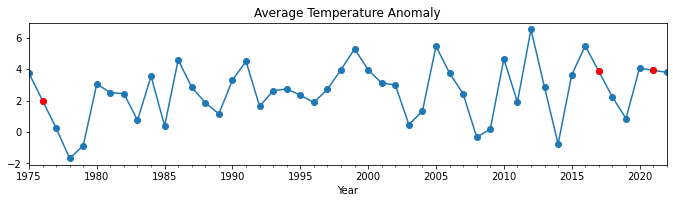

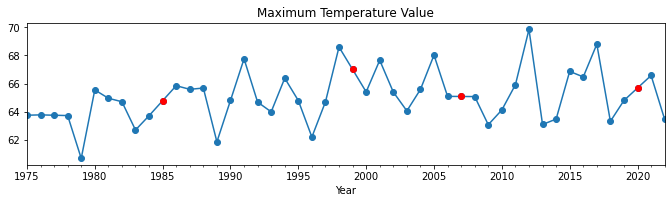

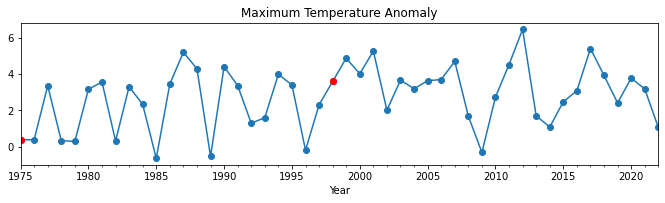

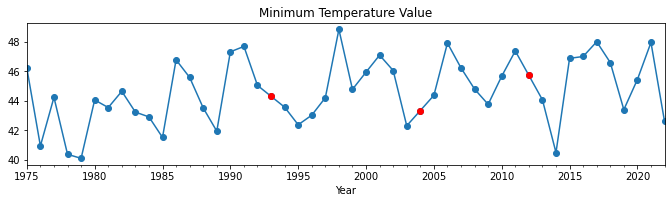

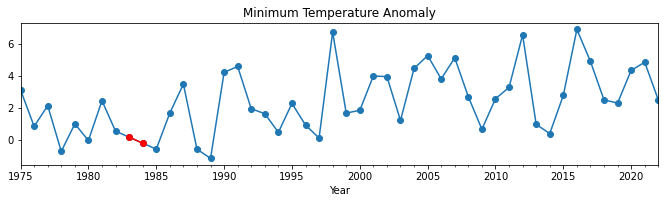

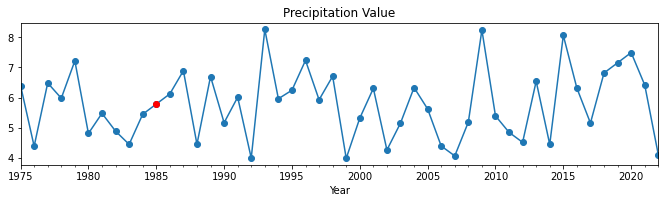

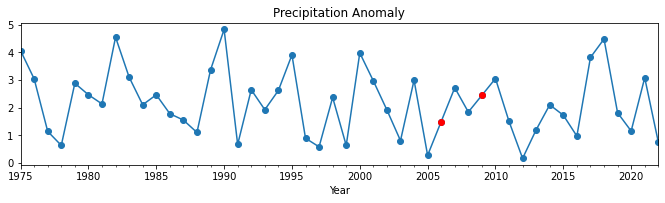

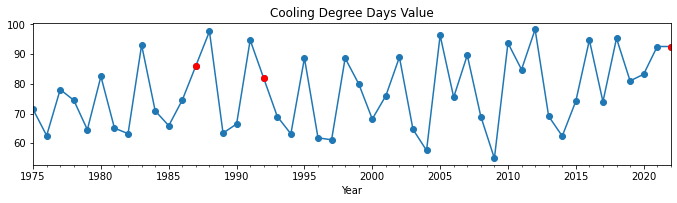

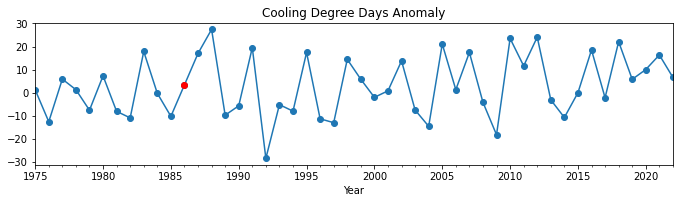

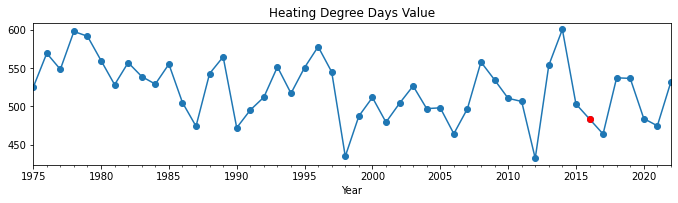

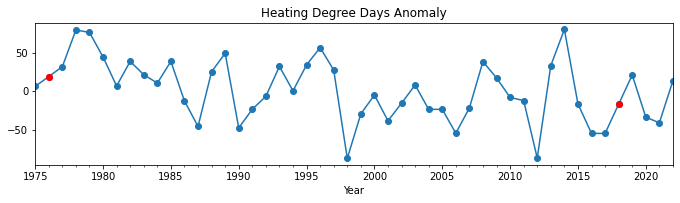

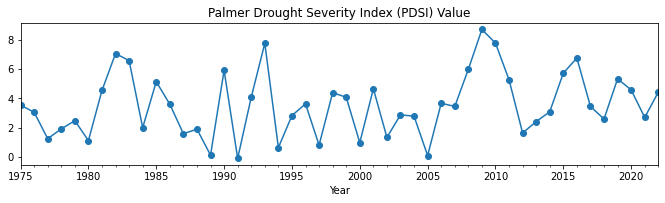

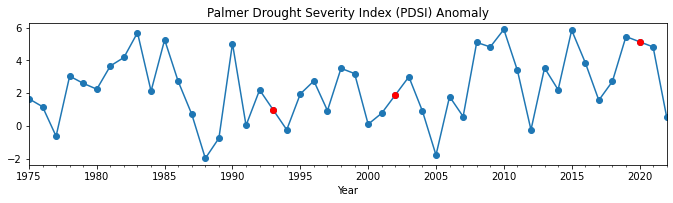

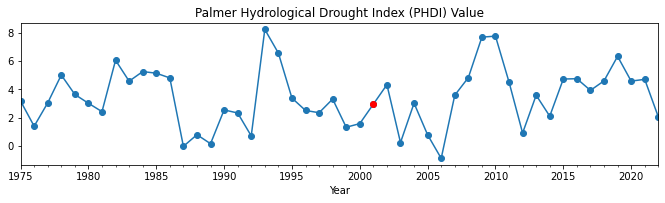

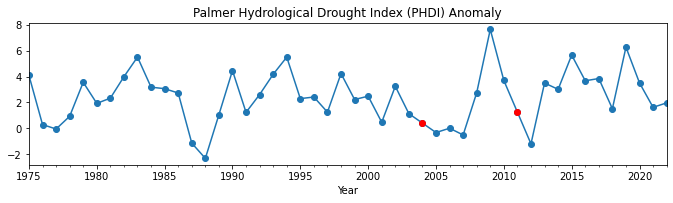

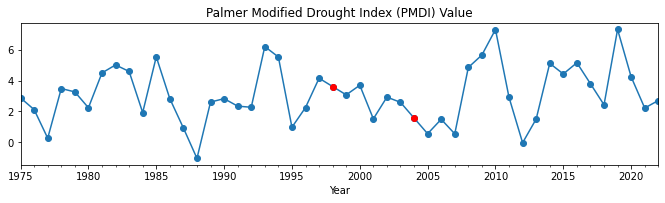

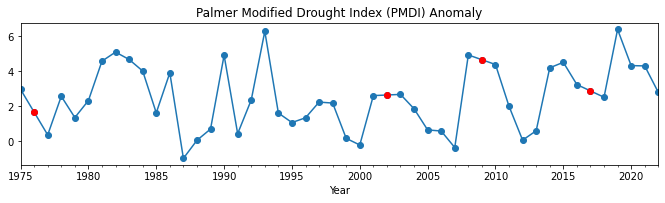

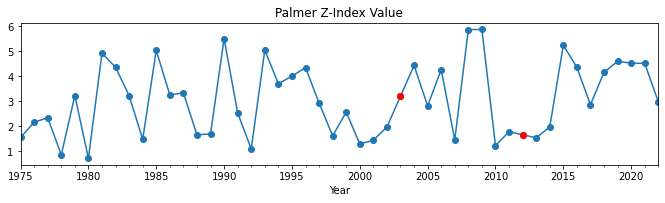

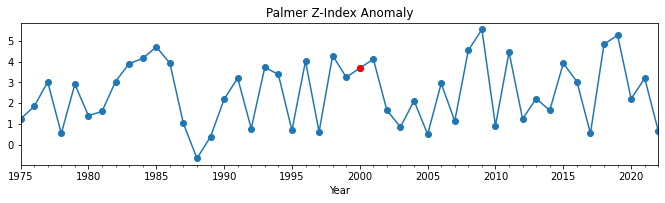

In [416]:
# VISUALIZING INTERPOLATED VALUES

for i,j in enumerate(colList[1:]):
    fig = plt.subplot(4,6,i+1)
    State_imp[j].plot(linestyle="-",figsize=(80,12),ax=fig,marker="o")
    State_imp[State_data.isnull()][j].plot(linestyle="-",figsize=(80,12),marker="o",c="r",ax=fig)
    plt.title(j)
    plt.show()

In [417]:
State_imp['t'] = np.round((State_imp.index - State_imp.index.min())/ np.timedelta64(1,"Y"))

In [418]:
from feature_engine.timeseries.forecasting import LagFeatures

lag_transformer = LagFeatures(variables=colList[1:],freq=['1YS','2YS','3YS','4YS','5YS'])
data_ = lag_transformer.fit_transform(State_imp)

In [419]:
from feature_engine.timeseries.forecasting import WindowFeatures
win_transformer = WindowFeatures(
    variables=colList[1:],
    functions=["mean", "std"],
#   window=[24*365], # Day, week, year.
    freq="1YS",
)

In [420]:
data_window = win_transformer.fit_transform(State_imp)

In [421]:
data_ = pd.concat([data_,data_window],axis=1)
data_ = data_.loc[:,~data_.columns.duplicated()]

In [422]:
data_.fillna(method="bfill",inplace=True)
data_.drop('State',axis=1,inplace=True)
data_.dropna(axis=1,inplace=True)
data_.isnull().sum().sort_values(ascending=False)

Planted (1000 Acres)                                        0
Cooling Degree Days Value_lag_5YS                           0
Yield (Pounds/ Harvested Area)_lag_5YS                      0
Average Temperature Value_lag_5YS                           0
Average Temperature Anomaly_lag_5YS                         0
                                                           ..
Palmer Hydrological Drought Index (PHDI) Value_lag_2YS      0
Palmer Hydrological Drought Index (PHDI) Anomaly_lag_2YS    0
Palmer Modified Drought Index (PMDI) Value_lag_2YS          0
Palmer Modified Drought Index (PMDI) Anomaly_lag_2YS        0
Palmer Z-Index Anomaly_window_3_std                         0
Length: 185, dtype: int64

In [423]:
train= data_[data_.index<pd.to_datetime("2003-01-01")]
test = data_[data_.index>=pd.to_datetime("2003-01-01")]

In [424]:
test.head()

,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,Precipitation Value,...,Palmer Hydrological Drought Index (PHDI) Anomaly_window_3_mean,Palmer Hydrological Drought Index (PHDI) Anomaly_window_3_std,Palmer Modified Drought Index (PMDI) Value_window_3_mean,Palmer Modified Drought Index (PMDI) Value_window_3_std,Palmer Modified Drought Index (PMDI) Anomaly_window_3_mean,Palmer Modified Drought Index (PMDI) Anomaly_window_3_std,Palmer Z-Index Value_window_3_mean,Palmer Z-Index Value_window_3_std,Palmer Z-Index Anomaly_window_3_mean,Palmer Z-Index Anomaly_window_3_std
Year,,,,,,,,,,,,,,,,,,,,,
2003-01-01,0.0,0.0,0.0,55.716667,0.466667,64.058333,3.666667,42.316667,1.208333,5.148333,...,2.070000,1.430065,2.715556,1.102711,1.687083,1.641570,1.573333,0.357258,3.153056,1.318376
2004-01-01,0.0,0.0,0.0,56.708333,1.333333,65.583333,3.191667,43.345833,4.458333,6.330833,...,1.621389,1.445794,2.347222,0.734693,2.652083,0.034583,2.210278,0.903363,2.207222,1.705919
2005-01-01,0.0,0.0,0.0,57.700000,5.450000,68.025000,3.633333,44.375000,5.266667,5.619167,...,1.599306,1.472247,2.365000,0.704764,2.400972,0.465209,3.207500,1.230833,1.537778,0.640144
2006-01-01,0.0,0.0,0.0,58.000000,3.750000,65.091667,3.700000,47.916667,3.808333,4.386667,...,0.412083,0.727083,1.575000,1.015833,1.735278,1.021947,3.488889,0.844666,1.152500,0.850567
2007-01-01,0.0,0.0,0.0,55.675000,2.425000,65.083333,4.700000,46.233333,5.125000,4.057500,...,0.038472,0.363960,1.209444,0.564606,1.036389,0.717613,3.843889,0.889864,1.852222,1.246516


In [425]:
train.corr()[colList[3]].sort_values(ascending=False)[:50]

Planted (1000 Acres)                                       NaN
Harvested (1000 Acres)                                     NaN
Yield (Pounds/ Harvested Area)                             NaN
Average Temperature Value                                  NaN
Average Temperature Anomaly                                NaN
Maximum Temperature Value                                  NaN
Maximum Temperature Anomaly                                NaN
Minimum Temperature Value                                  NaN
Minimum Temperature Anomaly                                NaN
Precipitation Value                                        NaN
Precipitation Anomaly                                      NaN
Cooling Degree Days Value                                  NaN
Cooling Degree Days Anomaly                                NaN
Heating Degree Days Value                                  NaN
Heating Degree Days Anomaly                                NaN
Palmer Drought Severity Index (PDSI) Value             

In [426]:
features = [col for col in data_.columns if ("lag" in col) or ("window" in col)]
print(f"Number of features {len(features)}")

Number of features 161


## Feature Selection

In [427]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# features.remove("Yield (Pounds/ Harvested Area)")
data_scaled = sc.fit_transform(train[features+['t']])

In [428]:
y = train['Yield (Pounds/ Harvested Area)'].to_frame()
X = data_scaled

In [429]:
model = Lasso(alpha=0.1)
model.fit(X,y)

Lasso(alpha=0.1)

In [431]:
feat_importances = pd.Series(index=features+['t'], data=model.coef_)
imp_features = feat_importances.abs()\
               [(feat_importances.abs()>0)].iloc[::-1].\
               sort_values(ascending=True).\
               plot(kind="barh", figsize=(3, 10))

In [394]:
imp_features_list = list(feat_importances.abs()[(feat_importances.abs()>0)].iloc[::-1].index)

# Modelling

In [395]:
from lightgbm import LGBMRegressor
from sktime.transformations.series.time_since import TimeSince

In [396]:
forecast_start = train.iloc[-1].name+pd.DateOffset(months=12)
forecast_steps = 20
model = LGBMRegressor(
                        min_data_in_bin=1,
                        min_data_in_leaf=1,
                        boosting = "gbdt",
                        linear_tree = True,
                        linear_lambda = 0.01,
                        n_estimators = 100,
                        bagging_freq = 1,
                        bagging_fraction = 0.8,
    
)
forecast_horizon = pd.date_range(
   forecast_start , periods=forecast_steps, freq="YS"
)

In [397]:
df_train = data_[data_.index<forecast_start]
df_test = data_[data_.index>=forecast_start]

In [398]:
feature_lis = imp_features_list
feature_lis.append('t')

y_train = df_train['Yield (Pounds/ Harvested Area)']
X_train = df_train[feature_lis]

y_test = df_test['Yield (Pounds/ Harvested Area)']
X_test = df_test[feature_lis]

In [399]:
from sklearn.preprocessing import MinMaxScaler
sc =MinMaxScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [400]:
model.fit(X_train_sc,y_train)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


LGBMRegressor(bagging_fraction=0.8, bagging_freq=1, boosting='gbdt',
              linear_lambda=0.01, linear_tree=True, min_data_in_bin=1,
              min_data_in_leaf=1)

In [401]:
from feature_engine.timeseries.forecasting import WindowFeatures
def preprocess_pipeline(df,col=colList,sc=sc,ifl=list(imp_features_list)):
    
    lag_transformer = LagFeatures(variables=col[1:],freq=['1YS','2YS','3YS','4YS','5YS'])
    df = lag_transformer.fit_transform(df)
    
    win_transformer = WindowFeatures(variables=colList[1:],functions=["mean", "std"],freq="1YS")
    df_window = win_transformer.fit_transform(df)
    
    df_ = pd.concat([df,df_window],axis=1)
    df_ = df_.loc[:,~df_.columns.duplicated()]
    
    df_.fillna(method="bfill",inplace=True)
    df_.dropna(axis=1,inplace=True)

    df_.drop('State',axis=1,inplace=True)
    
    predf = df_.loc[:,ifl]
    
    return predf

In [402]:
forecast_horizon = pd.date_range(X_test.index.min(),periods=20,freq="YS")

train_df= State_imp[State_imp.index<pd.to_datetime("2003-01-01")]
test_df = State_imp[State_imp.index>=pd.to_datetime("2003-01-01")]

df_pred = train_df.copy()
df_pred = pd.concat([df_pred,test_df])

for forecast_time in forecast_horizon:
    X_test_ = preprocess_pipeline(df_pred)
    X_test_ = X_test_.loc[[forecast_time]]
    X_test_ = sc.transform(X_test_)
    y_pred = model.predict(X_test_)
#     print(y_pred)
    df_pred.loc[[forecast_time],'Yield (Pounds/ Harvested Area)'] = y_pred

In [403]:
y_forecast = df_pred[df_pred.index>=forecast_start]

In [404]:
y_forecast

,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,...,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly,t
Year,,,,,,,,,,,,,,,,,,,,,
2003-01-01,FL,104.5,92.0,572.062304,73.554167,3.791667,84.208333,2.533333,61.533333,2.066667,...,8.916667,3.474167,3.084167,6.261667,4.939167,5.923333,6.546667,4.397500,3.614167,28.0
2004-01-01,FL,89.0,87.0,615.167509,74.816667,3.741667,84.358333,0.683333,64.266667,3.800000,...,4.666667,2.529167,4.139167,3.289167,1.966667,5.412917,2.567500,4.506250,2.262500,29.0
2005-01-01,FL,86.0,85.0,655.539465,73.833333,2.758333,84.904167,0.316667,61.683333,1.216667,...,3.250000,4.416667,3.026667,4.330000,3.007500,4.902500,2.525833,4.615000,1.831667,30.0
2006-01-01,FL,103.0,101.0,590.567437,72.358333,3.283333,85.450000,4.775000,62.283333,1.816667,...,-5.000000,-0.907500,-1.297500,-0.668333,2.009167,1.195833,-1.180833,2.048333,2.265000,31.0
2007-01-01,FL,85.0,83.0,626.355667,72.750000,1.675000,84.425000,1.750000,64.066667,4.600000,...,-8.000000,-3.311667,-2.701667,-1.311667,-1.634167,-1.290000,-2.666667,-0.828333,0.388333,32.0
2008-01-01,FL,67.0,65.0,600.009171,74.825000,0.750000,85.450000,0.875000,64.150000,2.683333,...,-2.666667,-0.218333,-1.608333,0.781667,-0.540833,1.334167,-0.042500,0.730000,1.946667,33.0
2009-01-01,FL,82.0,78.0,504.997295,73.158333,1.083333,84.675000,0.000000,61.658333,2.191667,...,24.166667,0.127500,0.737500,2.310000,3.987500,1.154167,3.777500,1.895000,2.111667,34.0
2010-01-01,FL,92.0,89.0,552.710507,70.191667,0.116667,81.066667,0.391667,60.300000,-0.166667,...,51.000000,2.975833,2.585833,3.484167,4.161667,2.309167,3.932500,0.117500,1.334167,35.0
2011-01-01,FL,122.0,118.0,632.699577,72.683333,4.608333,84.775000,5.100000,61.575000,2.108333,...,-4.333333,-1.128333,-1.518333,-3.128333,-2.450833,-1.995000,-0.371667,0.610833,2.827500,36.0


In [405]:
# y_forecast['State'] = "NV"
# y_forecast['Yield (Pounds/ Harvested Area)'] = 0
# y_forecast

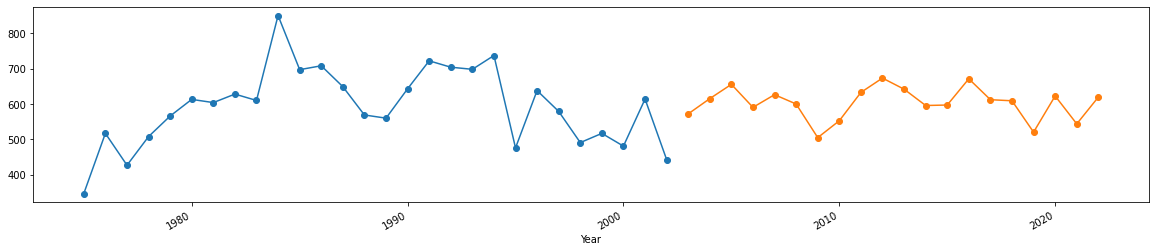

In [406]:
# RECURSIVE FORECASTING

plt.plot(y_train,label="train",linestyle="-",marker="o")
y_forecast['Yield (Pounds/ Harvested Area)'].plot(label="Prediction",figsize=(20,4),linestyle="-",marker="o")
# plt.plot(X_test.index,y_forecast,label="train",linestyle="-",marker="o")
plt.show()

In [407]:
# df = y_forecast.copy() 

In [408]:
df = pd.concat([df,y_forecast])

In [409]:
df = df.sort_values(by=["Year","State"])

In [410]:
df

,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,...,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly,t
Year,,,,,,,,,,,,,,,,,,,,,
2003-01-01,AL,525.0,510.0,592.419348,66.733333,1.475000,75.833333,1.033333,55.633333,3.933333,...,8.833333,5.057500,4.736667,5.936667,5.459167,6.582500,3.271667,5.014167,2.875000,28.0
2003-01-01,AR,980.0,945.0,740.237301,61.266667,3.616667,74.966667,0.366667,53.558333,1.841667,...,4.583333,4.019167,2.676667,1.060000,2.540000,2.038333,0.620000,0.772500,0.617500,28.0
2003-01-01,AZ,215.0,213.0,1279.535732,62.900000,4.275000,78.158333,4.383333,51.641667,2.208333,...,-10.000000,-0.618333,-1.799167,-0.618333,-1.827500,0.636667,-1.699167,0.370833,0.297500,28.0
2003-01-01,CA,550.0,545.0,1149.326433,62.425000,1.775000,74.850000,1.683333,48.991667,4.858333,...,-3.500000,2.254167,2.083333,0.785833,2.496667,1.045000,1.740833,2.925000,2.179167,28.0
2003-01-01,FL,104.5,92.0,572.062304,73.554167,3.791667,84.208333,2.533333,61.533333,2.066667,...,8.916667,3.474167,3.084167,6.261667,4.939167,5.923333,6.546667,4.397500,3.614167,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,AL,430.0,425.0,711.791989,66.008333,2.750000,78.683333,2.883333,54.341667,2.641667,...,-8.500000,3.722500,3.401667,3.722500,4.245000,4.710833,1.400000,2.057500,2.918333,47.0
2022-01-01,AR,640.0,630.0,810.340814,63.150000,4.500000,76.633333,2.033333,51.658333,2.000000,...,4.750000,3.710000,2.367500,2.410000,0.890000,0.670833,1.252500,1.932500,0.777500,47.0
2022-01-01,AZ,90.0,89.0,1273.121620,63.166667,1.541667,76.450000,3.675000,49.883333,4.450000,...,8.416667,1.435833,1.255000,0.171667,0.588333,1.430833,0.095000,0.263333,0.508333,47.0


In [607]:
sub = pd.read_csv('sub_v2.csv')
sub.head()

,Yield (Pounds/ Harvested Area),COTTON YIELD (Kg per ha),Cotton_Price[Dollar/ton]
0,549.132608,449.602093,1197.594127
1,857.515147,3185.873519,1306.475737
2,1287.418454,3258.736315,1247.622865
3,1212.418100,1354.321372,1090.751915
4,527.186770,1088.771878,1058.517562


In [714]:
# sub.drop("Yield (Pounds/ Harvested Area)",axis=1,inplace=True)

In [608]:
arr = np.array(df["Yield (Pounds/ Harvested Area)"])
arr = np.append(arr,np.zeros(2076))

In [609]:
sub["Yield (Pounds/ Harvested Area)"] = arr
sub.to_csv("sub_v3.csv",index=False)